GAN experiment for Eye Disease prediction

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import os
import time

import imageio
import glob
import matplotlib.pyplot as plt
from IPython import display
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
#from tensorflow_docs.vis import embed
from sklearn.model_selection import train_test_split
#!pip install -q git+https://github.com/tensorflow/docs
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import imageio
from scipy.linalg import sqrtm
from keras.applications.resnet_v2 import ResNet50V2, preprocess_input
from keras.models import Model
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image


Data Loading for GAN

In [3]:
# loading data to the model
file_ = '/content/drive/MyDrive/Eye_Dataset/test/test/9999.jpg'
print(file_)

/content/drive/MyDrive/Eye_Dataset/test/test/9999.jpg


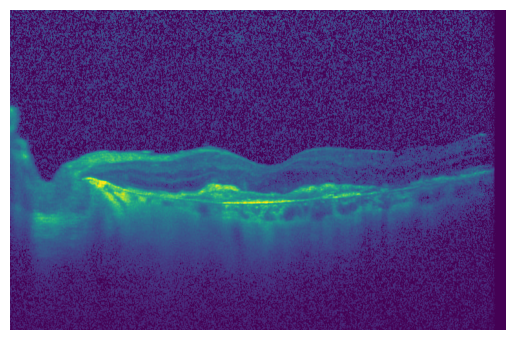

In [4]:
# Open the image file using PIL
image = Image.open(file_)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()

In [5]:
file_path = '/content/drive/MyDrive/Eye_Dataset'
train_original_path = '/content/drive/MyDrive/Eye_Dataset/train/train'
test_new_path = '/content/drive/MyDrive/Eye_Dataset/test_new/test'
train_new_path = '/content/drive/MyDrive/Eye_Dataset/train_new/train'
validation_path = '/content/drive/MyDrive/Eye_Dataset/validation/validation'




In [6]:
class_names_list = [d for d in os.listdir(train_original_path) if os.path.isdir(os.path.join(train_original_path, d))]
class_names_list

['CNV', 'DME', 'DRUSEN', 'NORMAL']

In [7]:
for split_type in ['train_new', 'test_new']:
    if not os.path.exists(os.path.join(file_path, split_type)):
        os.makedirs(os.path.join(file_path, split_type))


In [8]:
for split_type in ['train_new', 'test_new']:
    for class_name in class_names_list:
        if not os.path.exists(os.path.join(file_path, split_type, class_name)):
            os.makedirs(os.path.join(file_path, split_type, class_name))

In [ ]:
# Split data
import time
rng = np.random.default_rng()

for class_name in class_names_list:
    src_dir = os.path.join(train_original_path, class_name)
    image_names_list = os.listdir(src_dir)

    # Train:test = 80:20
    X_train, X_test, y_train, y_test = train_test_split(image_names_list,
                                                        [0]*len(image_names_list),  # Dummy labels
                                                        test_size=0.2,
                                                        random_state=rng.integers(500000))

    # Process train images
    for image_name in X_train:
        src_filename = os.path.join(train_original_path, class_name, image_name)
        dst_filename = os.path.join(file_path, 'train_new', class_name, image_name)
        if not os.path.exists(dst_filename):  # Check if the file already exists
            im = Image.open(src_filename)
            im.save(dst_filename)
            print("complete: train", class_name, dst_filename)
        else:
            print(f"File {dst_filename} already exists, skipping.")

    # Process test images
    for image_name in X_test:
        src_filename = os.path.join(train_original_path, class_name, image_name)
        dst_filename = os.path.join(file_path, 'test_new', class_name, image_name)
        if not os.path.exists(dst_filename):  # Check if the file already exists
            im = Image.open(src_filename)
            im.save(dst_filename)
            print("complete: test", class_name, dst_filename)
        else:
            print(f"File {dst_filename} already exists, skipping.")

end = time.time()  # End time
print("Total time taken: {:.2f} seconds".format(end - start))

complete: train CNV /content/drive/MyDrive/Eye_Dataset/train_new/CNV/CNV-412653-25.jpeg
complete: train CNV /content/drive/MyDrive/Eye_Dataset/train_new/CNV/CNV-7732521-89.jpeg
complete: train CNV /content/drive/MyDrive/Eye_Dataset/train_new/CNV/CNV-7710023-164.jpeg
complete: train CNV /content/drive/MyDrive/Eye_Dataset/train_new/CNV/CNV-2507646-5.jpeg
complete: train CNV /content/drive/MyDrive/Eye_Dataset/train_new/CNV/CNV-1729810-128.jpeg
complete: train CNV /content/drive/MyDrive/Eye_Dataset/train_new/CNV/CNV-364469-172.jpeg
complete: train CNV /content/drive/MyDrive/Eye_Dataset/train_new/CNV/CNV-5050880-3.jpeg
complete: train CNV /content/drive/MyDrive/Eye_Dataset/train_new/CNV/CNV-8002846-1.jpeg
complete: train CNV /content/drive/MyDrive/Eye_Dataset/train_new/CNV/CNV-6493580-226.jpeg
complete: train CNV /content/drive/MyDrive/Eye_Dataset/train_new/CNV/CNV-2444883-179.jpeg
complete: train CNV /content/drive/MyDrive/Eye_Dataset/train_new/CNV/CNV-8598714-195.jpeg
complete: train CNV 